In [ ]:
import numpy as np
import pandas as pd
import copy
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('USArrests.csv')
df.drop('Unnamed: 0',axis='columns',inplace=True)
df = df.to_numpy()

dataset = []
for i in range(len(df)):
  dataset.append([i, [df[i]]])

In [ ]:
def findDistance(arr1, arr2):
  sum = 0
  for i in range(len(arr1)):
    sum += (arr1[i]-arr2[i])**2
  return np.sqrt(sum)

In [ ]:
def minFunction(cluster1, cluster2):
  minDistance = 100000000
  for value1 in cluster1:
    for value2 in cluster2:
      if findDistance(value1, value2) < minDistance:
        minDistance = findDistance(value1, value2)
  return minDistance

In [ ]:
def maxFunction(cluster1, cluster2):
  maxDistance = 0
  for value1 in cluster1:
    for value2 in cluster2:
      if findDistance(value1, value2) > maxDistance:
        maxDistance = findDistance(value1, value2)
  return maxDistance

In [ ]:
def findMean(cluster):
  meanCluster = []
  for i in range(len(cluster[0])):
    sum = 0
    for j in range(len(cluster)):
      sum += cluster[j][i]
    sum = sum/len(cluster)
    meanCluster.append(sum)
  return meanCluster

In [ ]:
def meanFunction(cluster1, cluster2):
  mean1 = findMean(cluster1)
  mean2 = findMean(cluster2)
  return findDistance(mean1, mean2)

In [ ]:
def avgFunction(cluster1, cluster2):
  sum=0
  for i in range(len(cluster1)):
    for j in range(len(cluster2)):
      sum += findDistance(cluster1[i], cluster2[j])
  avgDist = sum/(len(cluster1)*len(cluster2))
  return avgDist

In [ ]:
def findCluster(index, dataset):
  for i in range(len(dataset)):
    if dataset[i][0] == index:
      return dataset[i]


In [ ]:
def findClosestCluster(dataset, callback):
  index1 = 0
  index2 = 0
  minDist = 10000000000
  for i in range(len(dataset)):
    for j in range(len(dataset)):
      if not(i == j):
        if callback(dataset[i][1],dataset[j][1]) < minDist:
          minDist = callback(dataset[i][1],dataset[j][1])
          index1 = dataset[i][0]
          index2 = dataset[j][0]
  return [index1, index2, minDist]

In [ ]:
def mergingFunction(dataset, callback):
  data = copy.deepcopy(dataset)
  index = len(data)
  result = []
  while len(data) > 1:
    closeCluster = findClosestCluster(data, callback)
    newCluster = []
    for item in findCluster(closeCluster[0], data)[1]:
      newCluster.append(item)
    for item in findCluster(closeCluster[1], data)[1]:
      newCluster.append(item)
    data.append([index, newCluster])
    index = index + 1
    result.append([closeCluster[0], closeCluster[1], closeCluster[2], len(newCluster)])
    data.remove(findCluster(closeCluster[0], data))
    data.remove(findCluster(closeCluster[1], data))
  return result

1. Minimum distance
2. Maximum distance
3. Mean distance
4. Average distance

Enter the choice for distance measure :1
Your have chosen 1

The dendrogram after agglomerative clustering is :


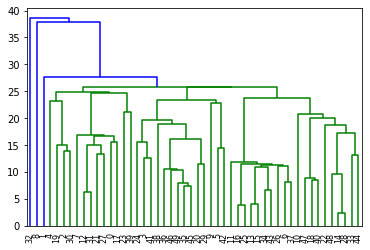


Do you want to continue? (Y/N) : Y

1. Minimum distance
2. Maximum distance
3. Mean distance
4. Average distance

Enter the choice for distance measure :2
Your have chosen 2

The dendrogram after agglomerative clustering is :


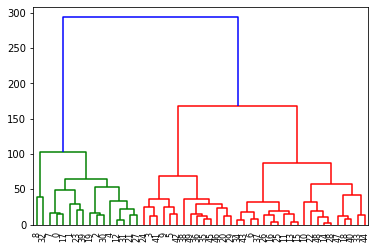


Do you want to continue? (Y/N) : Y

1. Minimum distance
2. Maximum distance
3. Mean distance
4. Average distance

Enter the choice for distance measure :3
Your have chosen 3

The dendrogram after agglomerative clustering is :


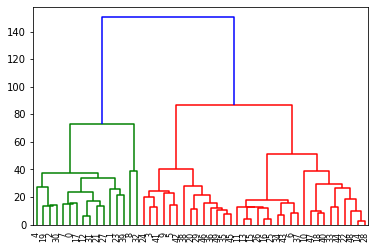


Do you want to continue? (Y/N) : Y

1. Minimum distance
2. Maximum distance
3. Mean distance
4. Average distance

Enter the choice for distance measure :4
Your have chosen 4

The dendrogram after agglomerative clustering is :


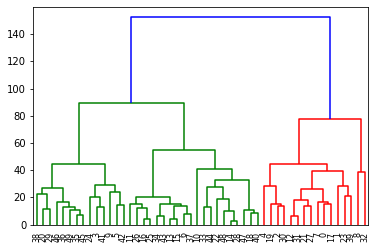


Do you want to continue? (Y/N) : N



In [ ]:
def agglomerativeClustering(dataset):
  while True:
    print("1. Minimum distance")
    print("2. Maximum distance")
    print("3. Mean distance")
    print("4. Average distance")
    print()
    choice = int(input("Enter the choice for distance measure :"))
    print("Your have chosen", choice)
    print()
    if choice == 1:
      callback = minFunction
    if choice == 2:
      callback = maxFunction
    if choice == 3:
      callback = meanFunction
    if choice == 4:
      callback = avgFunction
    print("The dendrogram after agglomerative clustering is :")
    sch.dendrogram(mergingFunction(dataset, callback))
    plt.show()
    print()
    ans = input("Do you want to continue? (Y/N) : ")
    print()
    if ans.lower() == "n":
      break
    
agglomerativeClustering(dataset)